In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,export_graphviz

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(889, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.5+ KB


In [6]:
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

In [7]:
train_x = data[['Sex','Age','Fare']]
train_y = data['Survived']

In [8]:
model_score = []
for i in range(10,60):
    tree_model=DecisionTreeClassifier(max_depth=i)
    tree_model.fit(train_x,train_y)
    model_score.append(tree_model.score(train_x,train_y))

In [9]:
model_score.index(max(model_score))

11

In [10]:
tree_model=DecisionTreeClassifier(max_depth=22)
tree_model.fit(train_x,train_y)
tree_model.score(train_x,train_y)

0.9763779527559056

In [11]:
model_score = []
for i in range(5,50):
    tree_model=DecisionTreeClassifier(max_depth=22,max_leaf_nodes=i)
    tree_model.fit(train_x,train_y)
    model_score.append(tree_model.score(train_x,train_y))

In [12]:
model_score.index(max(model_score))

44

In [13]:
tree_model = DecisionTreeClassifier(max_depth=22, max_leaf_nodes=50)
tree_model.fit(train_x,train_y)
tree_model.score(train_x, train_y)

0.8818897637795275

In [14]:
with open("titanic_tree.dot",'w') as f:
    f = export_graphviz(tree_model, feature_names=['Sex','Age','Fare'], out_file=f)

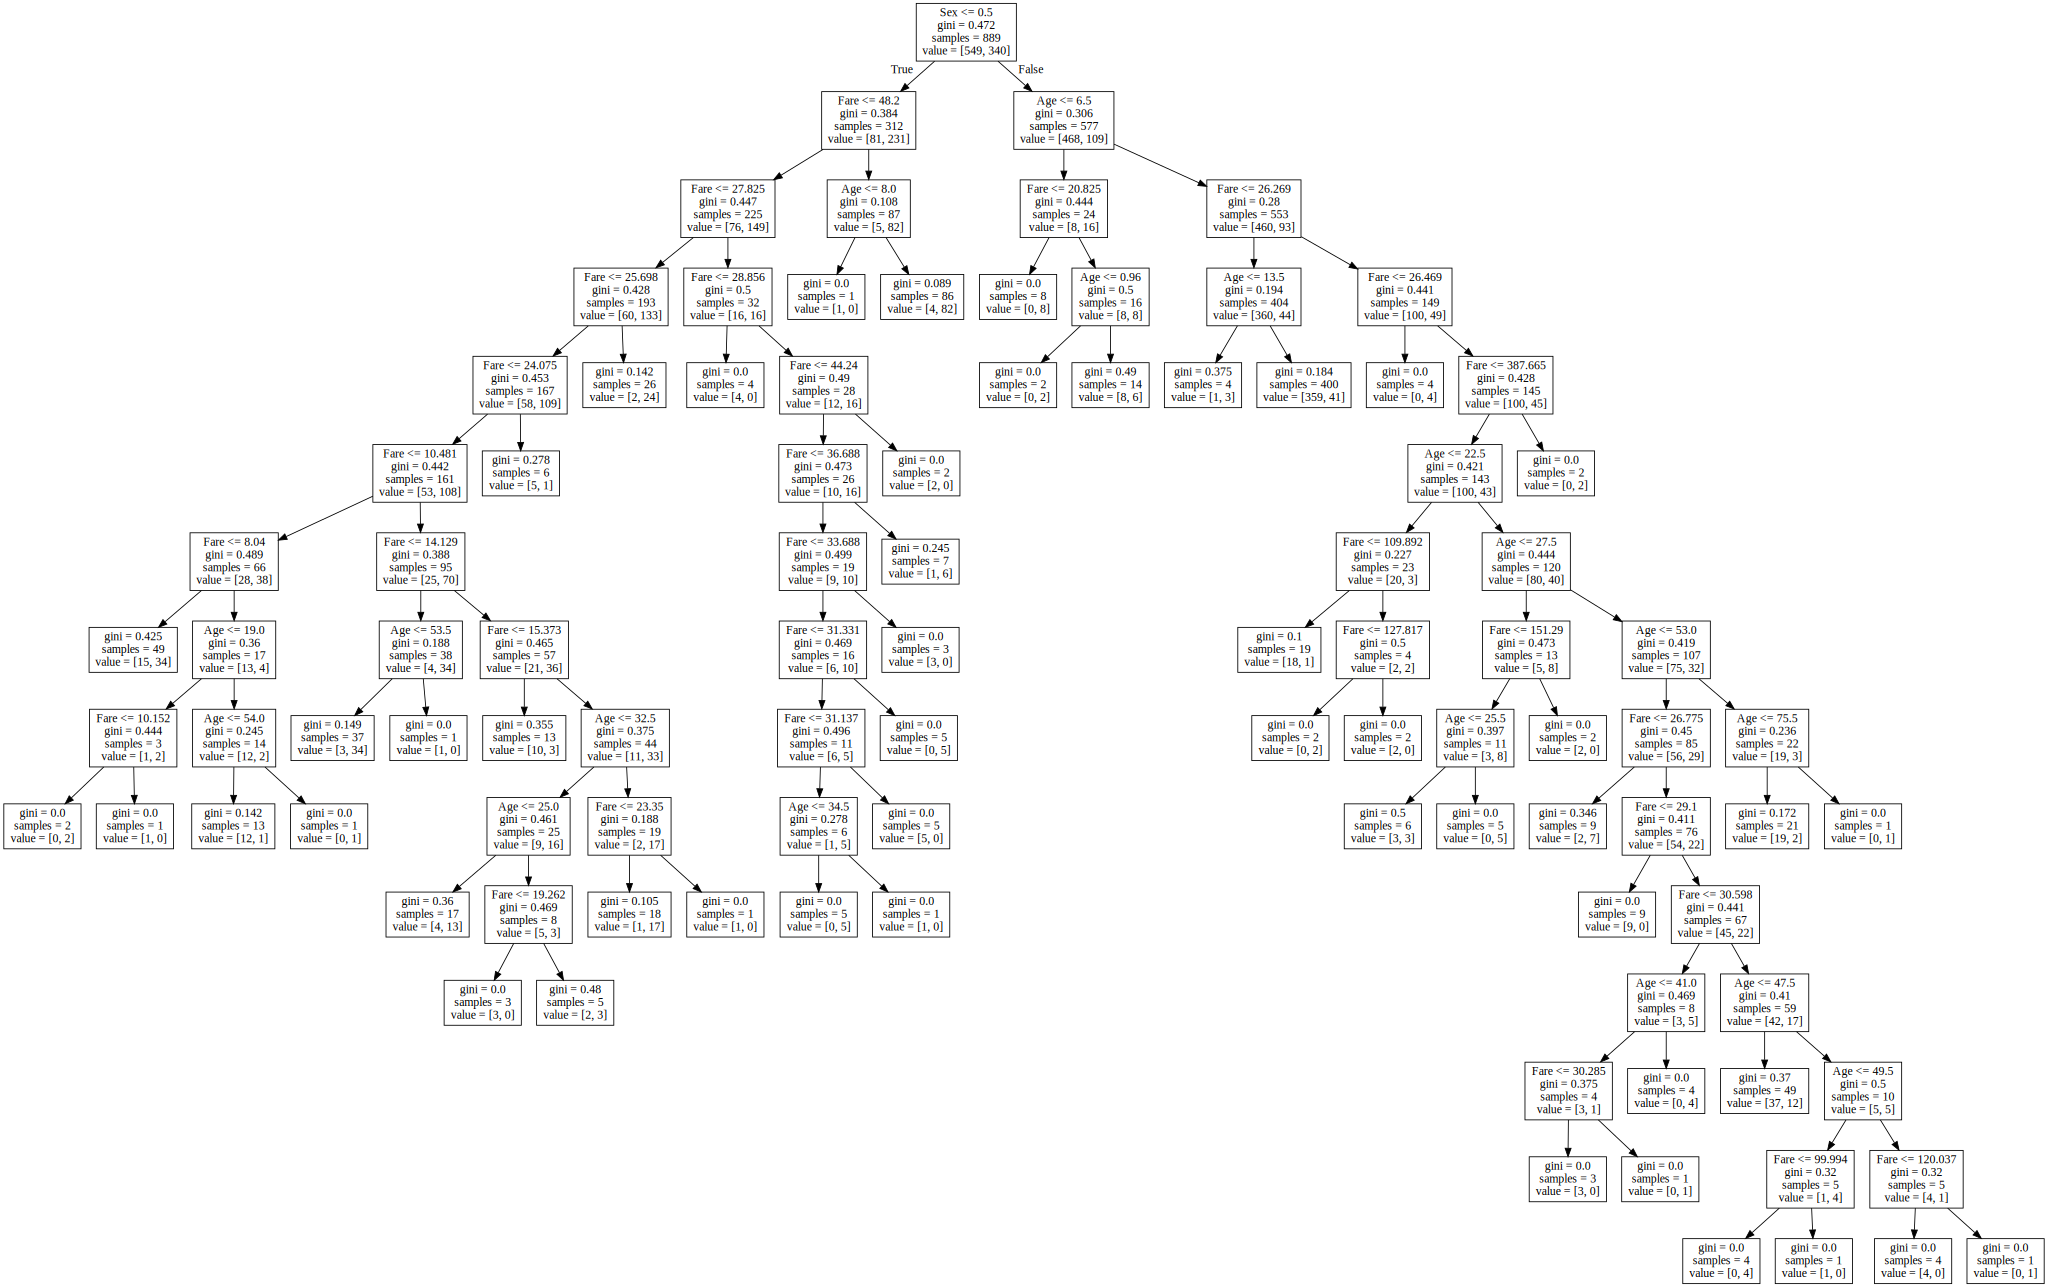

In [15]:
import graphviz
with open("titanic_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [16]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [17]:
test_data['Sex'] = le.fit_transform(test_data['Sex'])

In [18]:
test_x = test_data[['Sex','Age','Fare']]

In [19]:
ypred = tree_model.predict(test_x)

In [20]:
test_data['Survived'] = ypred
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S,1


In [21]:
test_data.to_csv("titanic_predicted_output")